# Final Project - Attendance Rates in Connecticut Public Schools
__October 17, 2023__

By Varsha Athreya

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data chosen records the attendance rates for various groups of interest in all Connecticut Public School Districts. The "District" displays represents the name of the district, however the first 13 rows after the columns that have a district name "Connecticut" are representative of the state as a whole. In other words, it is the average of all the following data in the table. "Category" and "Student group" are closely related, but "Student group" is more specific in its identification of the student's category. Lastly, the following six columns are all attendance rates - first the total number of students (count), and then the rate of attendance each year (rate). It is important to note that the 2019-2020 school year marks the beginning of COVID-19 in the United States, around the middle of March. Subseqently, the 2020-2021 school year was virtual for the majority of the time. Then in 2021-2022, most public schools returned back to the normal in-person schooling.

In order to clean the dataset, the columns "Date update", "District code", and "Reporting period" were dropped. "Date update" and "Reporting period" are the same date for all rows in the table, however it can be viewed in the original reading of the csv labeled "att". We deleted "District code" as well because district name is sufficient for identification purposes.

In [3]:
att_url ="https://data.ct.gov/api/views/t4hx-jd4c/rows.csv?accessType=DOWNLOAD"
att = pd.read_csv(att_url)

#cleaning dataset by renaming and dropping columns
att_clean = att.drop(columns = ["Date update", "District code", "Reporting period"])
att_clean.rename(columns={"2021-2022 student count - year to date":"2021-2022 Count"},inplace=True)
att_clean.rename(columns={"2021-2022 attendance rate - year to date":"2021-2022 Rate"},inplace=True)
att_clean.rename(columns={"2020-2021 student count":"2020-2021 Count"},inplace=True)
att_clean.rename(columns={"2019-2020 student count":"2019-2020 Count"},inplace=True)
att_clean.rename(columns={"2019-2020 attendance rate":"2019-2020 Rate"},inplace=True)
att_clean.rename(columns={"2020-2021 attendance rate":"2020-2021 Rate"},inplace=True)
att_clean.rename(columns={"District name":"District"},inplace=True)

print(att_clean)

                            District                    Category  \
0                        Connecticut                         NaN   
1                        Connecticut                Homelessness   
2                        Connecticut  Students With Disabilities   
3                        Connecticut          Free/Reduced Lunch   
4                        Connecticut          Free/Reduced Lunch   
...                              ...                         ...   
2014  The Woodstock Academy District          Free/Reduced Lunch   
2015  The Woodstock Academy District              Race/Ethnicity   
2016  The Woodstock Academy District              Race/Ethnicity   
2017  The Woodstock Academy District                  High Needs   
2018  The Woodstock Academy District                  High Needs   

                           Student group  2021-2022 Count  2021-2022 Rate  \
0                           All Students           500285          0.9169   
1     Students Experiencing H

Question: Was there an increase or decrease overall in attendance? How did COVID-19 and online learning affect attendance rates differently across subgroups? Which categories had the greatest decrease in attendance? Which subgroup had the highest increase in attendance due to COVID-19?

We began by taking the data for the first 13 rows which were all about Connecticut as a whole. We removed all the data except the attendance rate columns. Each of the rows corresponds to a different subgroup.

In [4]:
ct_1 = att_clean[0:13].drop(columns = ["Category", "District", "Student group", "2021-2022 Count","2020-2021 Count","2019-2020 Count"])

#original data was given with most recent data at the left and 
#moving in the past across columns towards the right
#here we reverse the column order for better graph display
ct_1 = ct_1[ct_1.columns[::-1]]

print(ct_1)

    2019-2020 Rate  2020-2021 Rate  2021-2022 Rate
0           0.9479          0.9294          0.9169
1           0.8884          0.8155          0.8348
2           0.9277          0.8946          0.8899
3           0.9314          0.8861          0.8851
4           0.9518          0.9299          0.9184
5           0.9340          0.8927          0.8901
6           0.9389          0.8948          0.8976
7           0.9559          0.9483          0.9314
8           0.9401          0.8931          0.8941
9           0.9362          0.8975          0.8935
10          0.9543          0.9523          0.9338
11          0.9606          0.9616          0.9398
12          0.9361          0.8996          0.8954


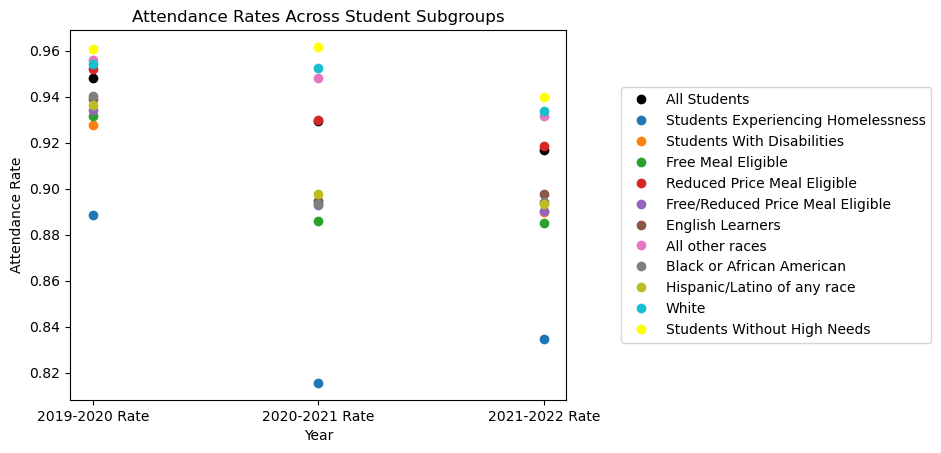

In [5]:
#displays 3 plot points for each subgroup
#colors repeat in default color setting, so we manually set some colors so there was no overlap
for x in range(13):
    if x ==0:
        plt.plot(ct_1.iloc[x], color = "black", linestyle="None", marker=".", markersize=12 ) 
    elif 0 <x <=10:
        plt.plot(ct_1.iloc[x], linestyle="None", marker=".", markersize=12)
    elif x ==11:
        plt.plot(ct_1.iloc[x], color = "yellow", linestyle="None",marker=".", markersize=12 )

plt.title("Attendance Rates Across Student Subgroups")
plt.xlabel("Year")
plt.ylabel("Attendance Rate")
plt.legend(att_clean["Student group"][0:13], loc = "center right", bbox_to_anchor=(1.75,0.5))
#bbox_to_anchor adjusts location of legend
#originally legend overlapped plot

The legend and graph show that the "Students Without High Needs" had consistently greater attendance rates all three years, and there was in fact an increase in attendance during the virtual year and a subsequent decrease when school was back in-person in 2021-2022. However, for the gorup with the lowest attendance rates, "Students Experiencing Homelessness," the virtual year resulted in a decrease in attendance rate, likely due to an inaccessibility to resources to attend school virtually. The graph clearly shows that the "Students Experiencing Homelessness" experienced the greatest decrease due to the change to virtual school during the 2020-2021 school year.

Next, we explored the difference in attendance rates across districts to determine if certain districts had generally lower and higher attendance rates for "All Students" only, not including the various subcategories of students. The graph displays the attendance rates for all districts across the three years, highlighting the lowest, the highest, and the attendance rates for all of Connecticut.

In [6]:
#drops all columns except the rates
ct_2 = att_clean.drop(columns = ["Category", "District", "Student group", "2021-2022 Count","2020-2021 Count","2019-2020 Count"])

#drops all rows except those that correspond to "All Students"
for index in range(2019):
    if att_clean.loc[index, "Student group"] != "All Students":
        ct_2.drop(index, inplace = True)
        
#resets indices to integers that increase by 1 starting with 0
ct_2 = ct_2.reset_index()

#reverses order of years
ct_2 = ct_2[ct_2.columns[::-1]]

print(ct_2)

     2019-2020 Rate  2020-2021 Rate  2021-2022 Rate  index
0            0.9479          0.9294          0.9169      0
1            0.9502          0.9680          0.9386     13
2            0.9413          0.8923          0.9045     19
3            0.9585          0.9550          0.9309     31
4            0.9583          0.9621          0.9457     40
..              ...             ...             ...    ...
196          0.9564          0.9602          0.9202   1972
197          0.9480          0.9321          0.8985   1977
198          0.9319          0.9000          0.8940   1990
199          0.9394          0.9458          0.8901   2002
200          0.9471          0.9589          0.9288   2011

[201 rows x 4 columns]


Text(0, 0.5, 'Attendance Rate')

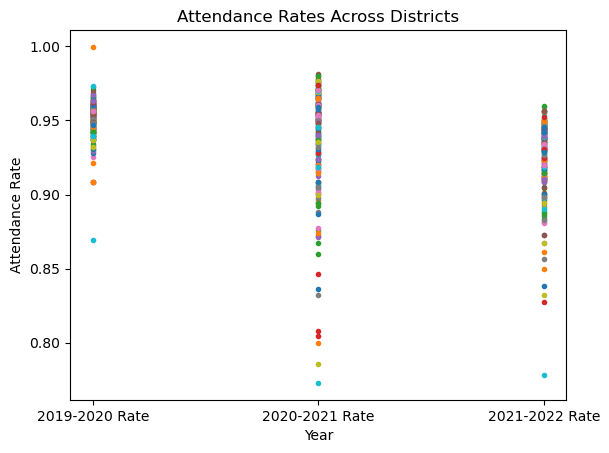

In [7]:
#displays overall distribution of attendance rates across districts
#not very helpful because too many districts, however it's clear theres maxes and mins
for x in range(201):
    plt.plot(ct_2.drop(columns = ["index"]).iloc[x], linestyle="None",marker=".")
        

plt.title("Attendance Rates Across Districts")
plt.xlabel("Year")
plt.ylabel("Attendance Rate")

The above plot makes it clear that there is one district that has consistently lower attendance rates every year, which is highlighed in red. The districts with the highest attendance rates for each school year are all depicted in green. The overall attendance rate for all districts in Connecticut is denoted with black.

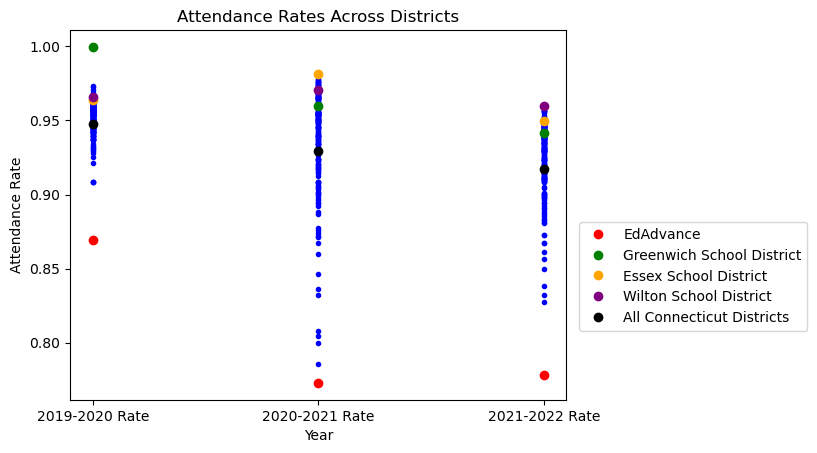

In [8]:
#the 4 following blocks of code find the min and max attendance rates for each year
#and the indices of those min and maxes
#and the names of the districts at which the min and maxes occur
att_low_rate = ct_2["2020-2021 Rate"].min()
att_low_ind = ct_2["2020-2021 Rate"].idxmin()
att_low_dist = att_clean.loc[int(ct_2.loc[att_low_ind, "index"]), "District"]

att_high_rate2 = ct_2["2020-2021 Rate"].max()
att_high_ind2 = ct_2["2020-2021 Rate"].idxmax()
att_high_dist2 = att_clean.loc[int(ct_2.loc[att_high_ind2, "index"]), "District"]

att_high_rate1 = ct_2["2019-2020 Rate"].max()
att_high_ind1 = ct_2["2019-2020 Rate"].idxmax()
att_high_dist1 = att_clean.loc[int(ct_2.loc[att_high_ind1, "index"]), "District"]

att_high_rate3 = ct_2["2021-2022 Rate"].max()
att_high_ind3 = ct_2["2021-2022 Rate"].idxmax()
att_high_dist3 = att_clean.loc[int(ct_2.loc[att_high_ind3, "index"]), "District"]

#here we plot all lines in blue
for x in range(201):
    plt.plot(ct_2.drop(columns = ["index"]).iloc[x], color = "blue", linestyle="None",marker="." )
    
#here we plot the mins, maxes, and all of connecticut in other colors to distinguish them clearly
#the plot points are also bigger for clarity
plt.plot(ct_2.drop(columns = ["index"]).iloc[att_low_ind], color = "red", linestyle="None",marker=".",label=att_low_dist,  markersize=12 )
plt.plot(ct_2.drop(columns = ["index"]).iloc[att_high_ind1], color = "green", linestyle="None",marker=".", label=att_high_dist1,  markersize=12)
plt.plot(ct_2.drop(columns = ["index"]).iloc[att_high_ind2], color = "orange", linestyle="None",marker=".", label=att_high_dist2,  markersize=12 )
plt.plot(ct_2.drop(columns = ["index"]).iloc[att_high_ind3], color = "purple", linestyle="None",marker="." , label=att_high_dist3,  markersize=12)
plt.plot(ct_2.drop(columns = ["index"]).iloc[0], color = "black", linestyle="None",marker=".", label="All Connecticut Districts",  markersize=12 )

plt.title("Attendance Rates Across Districts")
plt.xlabel("Year")
plt.ylabel("Attendance Rate")
plt.legend(bbox_to_anchor=(1.5,0.5))

This clear minimum likely represents inequities in access to resources in the area that represents the EdAdvance district. It is also interesting to note that the districts with the highest attendance rates had a decrease in attendance rates after the virtual COVID year, and the districts with lower attendance rates had an increase in attendance rates after the virtual COVID year. This shows that for those with access to the approrpriate technology (personal laptops, chargers, electricity) and space (safe, quiet, clean spaces to study), the virtual school during COVID year made it easier to attend class. However, on the other hand, those without access to the aforementioned resources had a more difficult time to attend class virtually.

The district that does not follow the previously mentioned general trend is Greenwich School District, which decreases all three school years, but decreases more steeply between 2020-2021 and 2021-2022. While further research would be necessary to see the school policies during each year, we can take a closer look at Greenwich School District's data.

In [15]:
gw = att_clean[505:517].drop(columns = ["Category"])
print(gw)

                      District                     Student group  \
505  Greenwich School District                      All Students   
506  Greenwich School District        Students With Disabilities   
507  Greenwich School District                Free Meal Eligible   
508  Greenwich School District       Reduced Price Meal Eligible   
509  Greenwich School District  Free/Reduced Price Meal Eligible   
510  Greenwich School District                  English Learners   
511  Greenwich School District                   All other races   
512  Greenwich School District         Black or African American   
513  Greenwich School District       Hispanic/Latino of any race   
514  Greenwich School District                             White   
515  Greenwich School District       Students Without High Needs   
516  Greenwich School District          Students With High Needs   

     2021-2022 Count  2021-2022 Rate  2020-2021 Count  2020-2021 Rate  \
505             8471          0.9418      

Analyzing this data, the 2019-2020 rates are abnormally high, with the "Reduced Price Meal Eligible" having an attendance rate of 1.000. This could be reasoned in several ways. While it could be a mistake in the documentation, we will assume that data.gov is a reputable sources and ensures the data they release is accurate. A quick search about the district shows that it is located on the Gold Coast, an affluent area home to hedge funds and financial services. This, in conjunction with its proximity to New York City making it an expensive area to live in. Generally, students will have full access to attend school. This includes having access to school materials, transportation, and a comfortable living situation that allows them to attend school regularly. 

However, this does not fully explain the students in groups such as "Meal Eligbility" and "English Learners" have high attendance rates. One explanation could be that the access to resources and funding in Greenwish District allows the school system to properly accomodate for students that do not have access to resources.